In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def m_numbers(J): return np.arange(-J,J+1)
def vertice(n): return [ i+0.5 for i in range(0,n) ]

In [146]:
# parametros
L = 5 # tamaño de la caja
m = m_numbers(3/2) # numero cuantico m -> dim(m) = 2J+1
b = vertice(L) # vertice centro del dipolo magnetico
mag = 1/3 # magnitud del dipolo magnetico
C0 = np.zeros((L,L,L)).tolist() # configuracion inicial tensor 3D

N = 125
m number = [-1.5 -0.5  0.5  1.5]
vertice = [0.5, 1.5, 2.5, 3.5, 4.5]


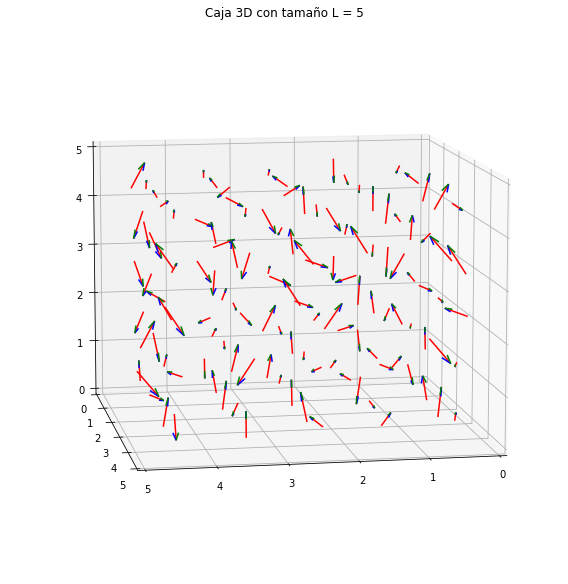

In [147]:
fig = plt.figure(figsize=(10,8),constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Caja 3D con tamaño L = {L}")

# -------------------------------------
print("N =",L**3)
print("m number =", m)
print("vertice =", b)
# -------------------------------------
xx, yy = np.meshgrid(range(L+1), range(L+1))
z = np.array([[1]*(L+1)]*(L+1))


# ------------------------------------- Configuracion inicial
for i in range(L):
    for j in range(L):
        for k in range(L):
            origin = np.array([b[i],b[j],b[k]]) # Origen centrado en los vertices
            rand1 = np.random.randint(0,360)
            #rand1 = 0
            #rand2 = 0
            rand2 = np.random.randint(0,180)
            rand3 = np.random.choice(m)
            eta = rand1*np.pi/180
            theta = rand2*np.pi/180
            V = np.array([[mag*np.cos(eta)*np.sin(theta), 
            mag*np.sin(eta)*np.sin(theta),
            mag*rand3]]) # Vector de momento dipolar magnetico
            C0[i][j][k] = V[0].tolist()
            ax.quiver(*origin, V[:,0], V[:,1], V[:,2] ,color=['r','b','g'],pivot='middle') # Graficar vectores
            continue

ax.set_xlim(0,L)
ax.set_ylim(0,L)
ax.set_zlim(0,L)
ax.view_init(10,80)


plt.grid()
plt.show()

In [148]:
c0 = np.flip(C0,axis=0).tolist()

In [153]:
range(10**4)

range(0, 10000)

In [204]:
def MCS_step(config,J,H,T):
    kb = 1.380649e-23 # constante de boltzmann [J/K]
    MCSmax = 10**4
    config = np.array(config)
    L = len(config)
    Em = []
    mcsm = []
    Mz = 0
    E = 0
    flag = False
    for mcs in range(MCSmax):
        #if flag == True: mcsm.append(mcs)
        #flag = False
        for i in range(L):
            for j in range(L):
                for k in range(L):
                    conf_i = config[i][j][k]
                    conf_j = config[(i+1)%L][j][k] + config[(i-1)%L][j][k] + config[i][(j+1)%L][k] + \
                             config[i][(j-1)%L][k] + config[i][j][(k+1)%L] + config[i][j][(k-1)%L]
                    Ei = -J*np.dot(conf_i,conf_j) - conf_i[2]*H
                    new_zcomp = np.random.choice(m)*mag
                    conf_trial = [conf_i[0],conf_i[1],new_zcomp]
                    Ef = -J*np.dot(conf_trial,conf_j) - conf_trial[2]*H
                    Delta_E = Ef - Ei
                    E += Ei
                    if Delta_E <= 0:
                        conf_i = conf_trial
                        E += Ef
                        #flag = True
                    elif np.random.rand() <= np.exp(-Delta_E/(kb*T)):
                        conf_i = conf_trial
                        E += Ef
                        #flag = True
                    config[i][j][k] = conf_i
                    Em.append(abs(E))
    return config,Em,mcsm

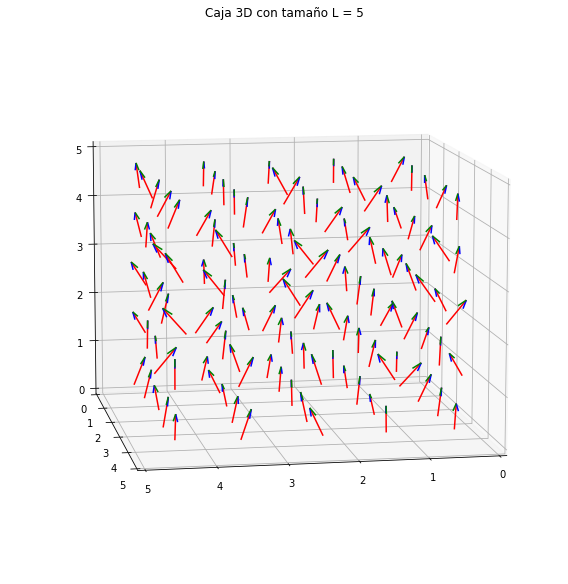

In [205]:
fig = plt.figure(figsize=(10,8),constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Caja 3D con tamaño L = {L}")


cf,E,mcs = MCS_step(c0,1,100,10)
for i in range(L):
    for j in range(L):
        for k in range(L):
            origin = np.array([b[i],b[j],b[k]])
            c0m = cf[i][j][k]
            V = np.array([c0m])
            ax.quiver(*origin, V[:,0], V[:,1], V[:,2] ,color=['r','b','g'],pivot='middle')
            continue
ax.set_xlim(0,L)
ax.set_ylim(0,L)
ax.set_zlim(0,L)
ax.view_init(10,80)
plt.grid()
plt.show()

In [212]:
mcs

[]

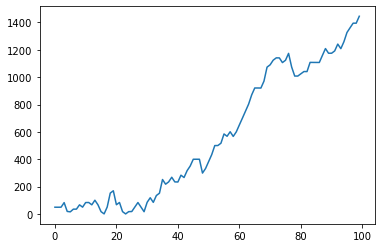

In [211]:
plt.plot(mcs,E[:100])